# Code development with flow control: Monthly mean temperature calculation

In this activity we want to put the attention to the problem of calculating the average.
We have all the 'ingredients' now available to load data from a spreadsheet (comma-separated CSV file format).
**We work first with a simple and clean data set: Daily mean temperatures of a single month. 

**Here we use the station KALB, that is the Albany Airport weather station.**

Now that we know how to plot data, it is always a good idea to take a look at the data. That includes input as well as output of the calculations.


In [2]:
# I use this for math equation rendering 
# Not part of the learning material in this course (optional)
from IPython.display import display, Math, Latex

In [3]:
%matplotlib inline
# we import our standard suppport packages
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## 1. Getting the data files


### 1.1 Goto to Github and download the file KALB_daily_tavg_jan2015.csv etc.

The data files are [located in the folder data on GitHub](https://github.com/oet808/ATMENV315/tree/master/data)



### 1.2 Create a new folder in your Jupyter course directory ENV315 
 
Rename the folder into '__data__'. It's good time to make sure you work in a folder called unit3. 
Make sure you have the directory structure:
   - ENV315
        - data
        - unit1
        - unit2
        - unit3

### 1.3 Enter the new data directory and upload the downloaded data file
Check for the file name extension. It must end with __.csv__.
 

## 2. Loading the data from the CSV file and assigning the columns to variables

### 2.1 We have to adjust the path and filename to our local file names and folder system

Here the user of the script needs to make updates. I like to separate this part therefore from the following code.
The code that follows then should work for other users on other file systems, too.

In [4]:
##############################################
# User of the script should make changes here
##############################################
# This notebook is located inside unit3 
# here we use the '../' in the path name to indicate that the data directory is one up in the parent directory.
path="../data/"
filename=path+"KALB_daily_tavg_jan2015.csv"
print("working with file "+filename)



working with file ../data/KALB_daily_tavg_jan2015.csv


### 2.2 The next cell shows how you can load the data and assign them to variables 

The result is two 1-dimensional numpy arrays. You are familiar with such data arrays (see unit 2).

In [5]:
##############################################
# MAIN PART OF THE SCRIPT
##############################################
data=np.loadtxt(filename,delimiter=',')
# data is a 2-dimensional numpy array with several rows and 2 columns 
# we assign the first column (day) to a new variable
# and the temperature data from the second column to variable temp
# that makes the arrays 1-dimensional for us
day=data[:,0]
temp=data[:,1]

In [6]:
# test if we loaded the data correctly:
# A numpy array is assigned to variable named 'data' when successful
# It has two columns with data
# check that they match the data columns shown on the GitHub page  
print("The variable named data contains an object of type "+str(type(data)))
print("The numpy array is a 2-dimensional array. We can get the shape of the array")
print("with two methods:")
print("(a) using this function:  np.shape(data)")
print("(b) using this statement: data.shape") 
print("The former option is more consistent with our standard function call methods.")
print("The latter is a more universally applied object-oriented programming style")
print(np.shape(data))
print(data.shape)

The variable named data contains an object of type <class 'numpy.ndarray'>
The numpy array is a 2-dimensional array. We can get the shape of the array
with two methods:
(a) using this function:  np.shape(data)
(b) using this statement: data.shape
The former option is more consistent with our standard function call methods.
The latter is a more universally applied object-oriented programming style
(31, 2)
(31, 2)


## 3 Problems: 

### 3.1 Plot of the temperature data and validate the data are in the expected range!


<function matplotlib.pyplot.show(close=None, block=None)>

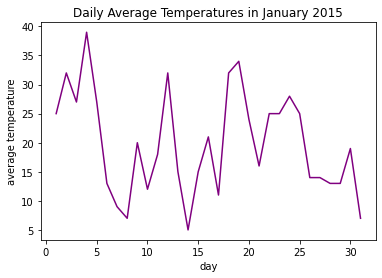

In [7]:
plt.plot(day,temp,color='purple')
plt.xlabel('day')
plt.ylabel('average temperature')
plt.title('Daily Average Temperatures in January 2015')
plt.show

### 3.1 Problem: Calculate the average temperature for the month from the daily data!


In [8]:
display(Math(r'\Large \bar{x}= \frac{1}{n} \sum_{i=1}^{n}x_i'))

<IPython.core.display.Math object>

### 3.1a) Use a for-loop

In [20]:
i=0
sum=0
for i in range(len(day)):
    sum=sum+temp[i]
    i=i+1
 
print('done')   
    
    
avgtemp=sum/(len(day))
print(avgtemp)




done
19.903225806451612


### 3.2b) Use a while loop

In [21]:
i=0
sum=0
while i in range(len(day)):
    sum=sum+temp[i]
    i=i+1

print('done')
avgtemp=sum/(len(day))
print(avgtemp)

done
19.903225806451612


## 4. Summary: 

We can calculate the average with an explicit loop. 

Key steps were: 
- Making sure we have the correct path and filename to load the data
- Use the numpy function _loadtxt_ to load the data into a 2-dimension numpy array (with rows and columns represented by the first and second dimension/index, respectively)
- form a loop that processes element by element the temperature data array
- use the incremental summation inside the loop for the counter variable (e.g. _n=n+1_) and the for the summation of the daily temperature data.
- finish the calculation after the loop ended (dividing the sum by the number of data)


__But we may not be always so lucky and have complete data, or wrong data (outlier) that we need to exclude from the data analysis.__


The next tasks will be to improve the code, step by step to solve on problem after another:
1. detecting dummy values that mark missing values in the data and excluding them from the average calculation
2. a check for the valid data range. Knowing what is a 'valid' range is sometimes easy (e.g. relative humidity can only be between 0-100%, but often it requires good knowledge about the observed environment.)



## Optional task

Show the monthly average value in the same graph above. For example, you could add another marker symbol.


<function matplotlib.pyplot.show(close=None, block=None)>

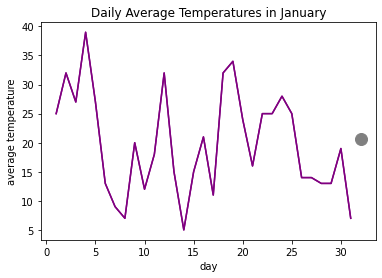

In [12]:
plt.plot(day,temp,color='purple')
plt.plot(day[-1]+1, avgtemp,'o',color='gray',markersize=12)
plt.plot(day,temp,color='purple')
plt.xlabel('day')
plt.ylabel('average temperature')
plt.title('Daily Average Temperatures in January')
plt.show

## Notes

#### a)
Numpy has the function _np.mean()_ to do such calculations. We use this exercise to practice the programming skills. Later we will use the numpy functions for the data analysis.

#### b) 
We could work directly with the data files in the GitHub repository. However, we wnated to practice the work with the Jupyterlab folders and data files.

The developers of Numpy are giving us powerful functions. We can work with remote data files directly when they are in the right plain-text format (no fancy HTML code around the raw data). You can avoind downloading files and storing them locally.

In [ ]:
filename='https://raw.githubusercontent.com/oet808/ATMENV315/master/data/KALB_daily_tavg_jan2015.csv'
print("working with file "+filename)
test=np.loadtxt(filename,delimiter=',')
print(test)


---
## Suggested Reading:
    

- E-book "How to Think Like a Computer Scientist - Learning with Python" (CSPY)
    - [CSPY 5.1 - 5.7 : if-else statements](https://greenteapress.com/thinkpython2/html/thinkpython2006.html)
    - [CSPY 7.1 - 7.3 code iteration (looping) with while statements](https://greenteapress.com/thinkpython2/html/thinkpython2008.html)           
    - [CSPY 10.3  code iteration (looping) with for-in statements](https://greenteapress.com/thinkpython2/html/thinkpython2011.html)

Optional, secondary sources for further reading (in case you want alternative explanations to the CSPY book chapters):
- [if-else, if-elif-else](https://www.python-course.eu/python3_conditional_statements.php)
- [while loop](https://www.python-course.eu/python3_loops.php)
- [for loop](https://www.python-course.eu/python3_for_loop.php)  
